In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df1 = pd.read_csv('train_dataset.csv')
df1

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,3,2,3,3,2,0,2,0,0,...,0,0,0,3,2,1,0,2,27,3
1,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,52,5
2,2,2,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,30,4
3,2,2,1,0,1,0,0,0,0,0,...,0,0,0,0,1,3,0,2,62,4
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,3,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1,1,0,1,0,0,3,0,1,0,...,0,0,0,0,0,0,1,1,9,6
530,2,1,1,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,12,6
531,2,2,0,0,0,0,2,0,2,1,...,0,0,0,0,0,1,2,2,7,6
532,2,1,2,0,0,0,2,0,2,0,...,0,0,0,0,0,0,2,0,11,6


In [2]:
X_train_sm = df1.drop('class', axis=1)
y_train_sm = df1['class']

In [3]:
import pandas as pd
df2 = pd.read_csv('test_dataset.csv')
df2

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,spongiosis,follicular_horn_plug,inflammatory_mononuclear_infiltrate,age,class
0,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,36,2
1,3,1,2,3,2,2,0,2,0,0,...,0,0,0,2,0,0,0,3,16,3
2,2,1,2,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,1,35,4
3,1,3,1,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,3,60,1
4,3,2,1,0,2,0,0,0,0,0,...,0,0,0,0,0,3,0,2,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,2,2,2,1,2,0,2,0,0,...,0,0,0,2,0,3,0,2,36,3
70,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,30,2
71,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,27,4
72,2,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,2,35,2


In [4]:
X_test = df2.drop('class',axis=1)
y_test = df2['class']

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pipeline: Scaling → Logistic Regression
log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=5000,
        random_state=42
    ))
])

# Fit on SMOTE-balanced training data
log_reg_pipeline.fit(X_train_sm, y_train_sm)

# Predict on test data
y_pred = log_reg_pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9594594594594594

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74



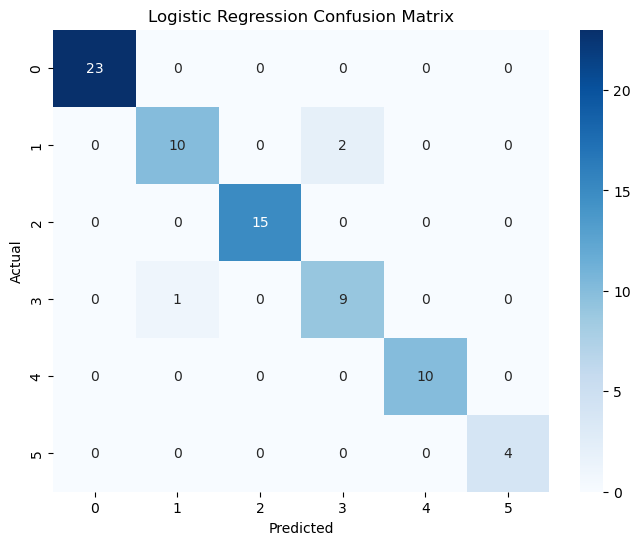

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Pipeline: Scaling → Logistic Regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=5000,
        random_state=42
    ))
])

# UPDATED Hyperparameter grid
# Only C affects accuracy meaningfully → expanded range for better tuning
param_grid = {
    "logreg__C": [0.01, 0.1, 1, 3, 5, 10, 50, 100, 200]
    # tol removed — it does not improve accuracy
}

# Stratified K-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1_macro",   # good for multiclass imbalance
    n_jobs=-1,
    cv=cv,
    verbose=2,
    refit=True
)

# Fit on SMOTE-balanced training data
grid.fit(X_train_sm, y_train_sm)

# Display best settings
print("Best Parameters:", grid.best_params_)
print("Best CV Score (f1_macro):", grid.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'logreg__C': 1}
Best CV Score (f1_macro): 0.986960700397233



Test Accuracy: 0.9594594594594594

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74



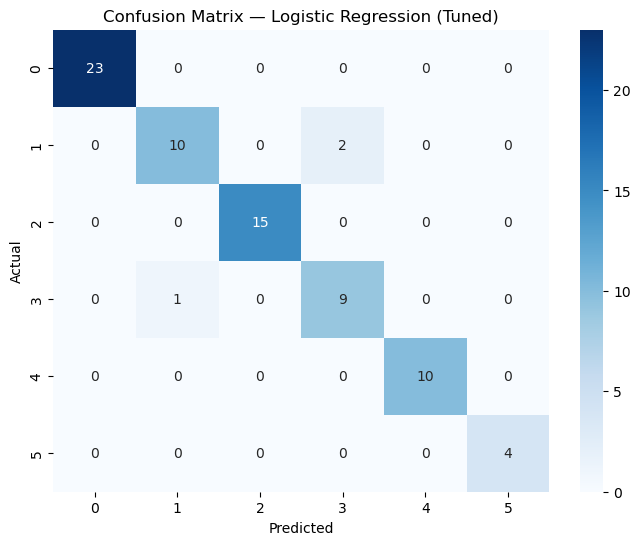

In [8]:
# ------------------------------------
# Train model using the best parameters
# ------------------------------------

best_params = grid.best_params_

# Extract only LogisticRegression params (remove "logreg__" prefix)
logreg_params = {k.replace("logreg__", ""): v for k, v in best_params.items()}

# Build final pipeline with best hyperparameters
best_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=5000,
        random_state=42,
        **logreg_params
    ))
])

# Fit on full SMOTE-balanced training data
best_model.fit(X_train_sm, y_train_sm)

# -----------------------
# Test performance
# -----------------------

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = best_model.predict(X_test)

# Accuracy
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Macro-average AUC Score: 0.9990311379928315


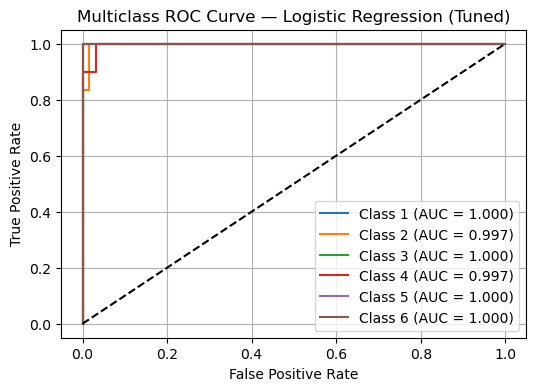

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------
# Binarize the labels for multiclass ROC
# --------------------------------------------
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Get predicted probabilities from the best model
y_proba = best_model.predict_proba(X_test)

# --------------------------------------------
# Compute macro-average AUC
# --------------------------------------------
auc_score = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
print("Macro-average AUC Score:", auc_score)

# --------------------------------------------
# Plot ROC Curve for each class
# --------------------------------------------
plt.figure(figsize=(6, 4))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.3f})")

# Plot random line
plt.plot([0, 1], [0, 1], "k--")

plt.title("Multiclass ROC Curve — Logistic Regression (Tuned)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
